In [1]:
from eagergradcamtf import grad_cam

In [2]:
import tensorflow as tf

In [3]:
from PIL import Image

In [4]:
with open('model_partfreeze0.1.json', 'r') as f:
    model_init = tf.keras.models.model_from_json(f.read())
model_init.load_weights('weights_partfreeze0.1.h5')

In [5]:
y = model_init.get_layer(model_init.layers[-4].name).output
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1, activation=None, name='output_dense')(y) # activation none for Grad-CAM
model = tf.keras.models.Model(inputs=model_init.input, outputs=y)

In [6]:
im = Image.open('locked/img1.jpg')

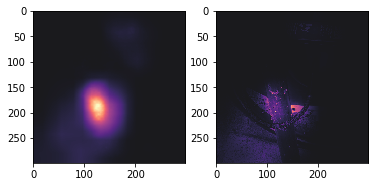

In [17]:
grad_cam('locked/img1.jpg', model, (299,299))

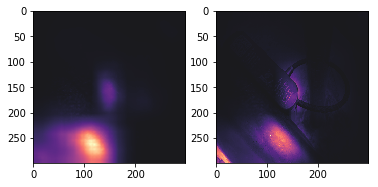

In [7]:
grad_cam('locked/img4.jpg', model, (299,299))  #hopeful

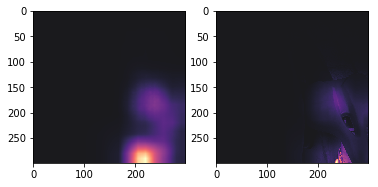

In [16]:
grad_cam('locked/img5.jpg', model, (299,299))  #hopeless

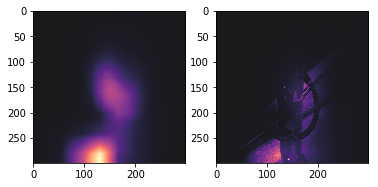

In [17]:
grad_cam('locked/img9.jpg', model, (299,299))  #hopeful

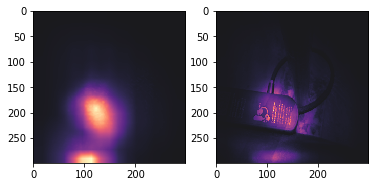

In [45]:
grad_cam('locked/img11.jpg', model, (299,299))  # hopeful

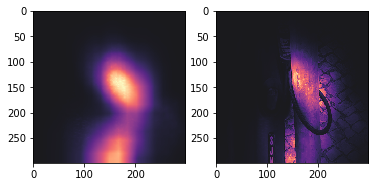

In [46]:
grad_cam('locked/img18.jpg', model, (299,299))  #hopeful

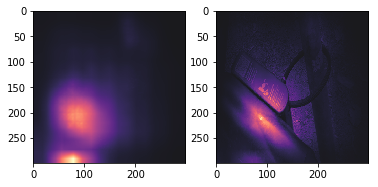

In [47]:
grad_cam('locked/img21.jpg', model, (299,299))  #hopeful

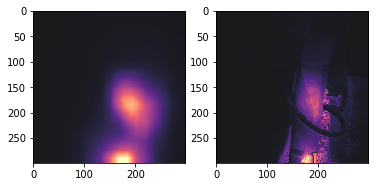

In [48]:
grad_cam('locked/img22.jpg', model, (299,299))  #hopeful

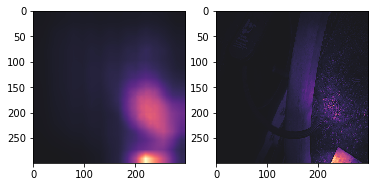

In [49]:
grad_cam('locked/img24.jpg', model, (299,299))  #hopeful

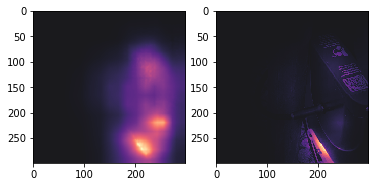

In [50]:
grad_cam('locked/img26.jpg', model, (299,299))  #hopeless

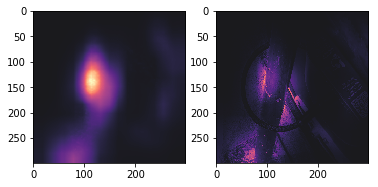

In [51]:
grad_cam('locked/img29.jpg', model, (299,299))  #hopeful

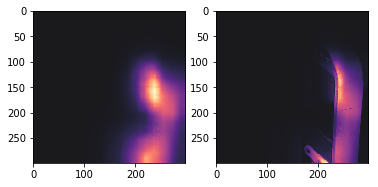

In [52]:
grad_cam('locked/img40.jpg', model, (299,299))  #hopeless

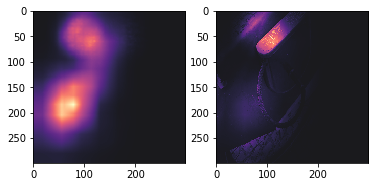

In [53]:
grad_cam('freelocked/img0-kopia.jpg', model, (299,299))  #hopeful

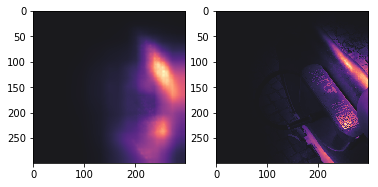

In [54]:
grad_cam('freelocked/img1-kopia.jpg', model, (299,299))  #hopeful

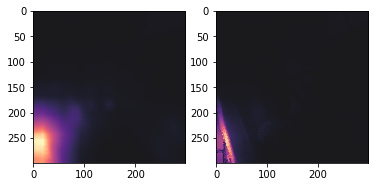

In [55]:
grad_cam('freelocked/img13.jpg', model, (299,299))  #hopeless

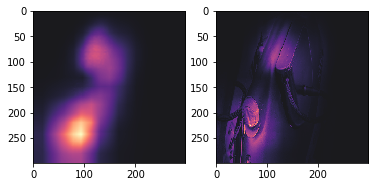

In [56]:
grad_cam('freelocked/img14-kopia.jpg', model, (299,299))  #hopeless

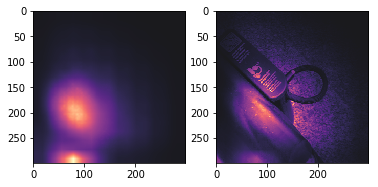

In [57]:
grad_cam('freelocked/img15.jpg', model, (299,299))  #hopeful

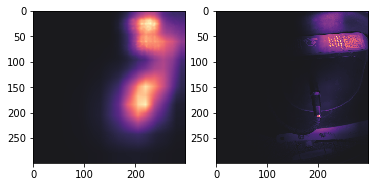

In [58]:
grad_cam('freelocked/img27.jpg', model, (299,299))  #hopeful

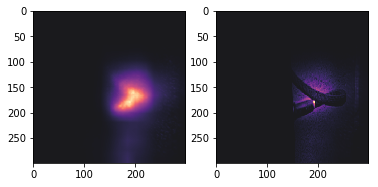

In [59]:
grad_cam('freelocked/img30.jpg', model, (299,299))  #very hopeful

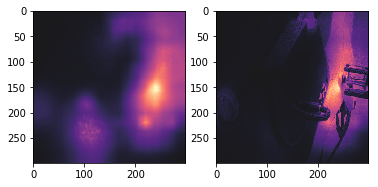

In [60]:
grad_cam('freelocked/img35.jpg', model, (299,299))  #hopeless

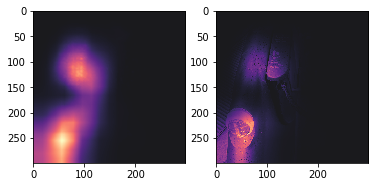

In [61]:
grad_cam('freelocked/img38.jpg', model, (299,299))  #hopeless

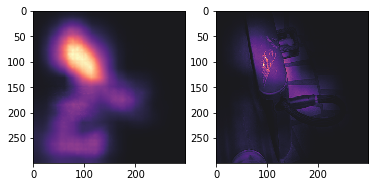

In [62]:
grad_cam('freelocked/img69.jpg', model, (299,299))  #hopeful

In [4]:
from tensorflow.keras.applications import ResNet50

In [5]:
model_init = ResNet50(include_top=True)

In [6]:
y = model_init.get_layer(model_init.layers[-2].name).output
# y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1000, activation='linear', name='fc1000')(y) # activation none for Grad-CAM
model = tf.keras.models.Model(inputs=model_init.input, outputs=y)

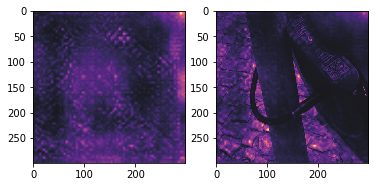

In [8]:
grad_cam('locked/img162.jpg', model, (299,299), watch_layer_instances=(tf.keras.layers.Conv2D, tf.keras.layers.SeparableConv2D))

In [8]:
from lime import lime_image

In [9]:
from skimage.segmentation import mark_boundaries

In [12]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [14]:
explainer = lime_image.LimeImageExplainer()

# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(np.array(im), model.predict, top_labels=2, hide_color=0, num_samples=1000)

/Users/kjczarne/anaconda3/envs/fubarenv/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=2.03655e-18): result may not be accurate.
  overwrite_a=False)


W0615 16:03:08.223984 4656330176 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


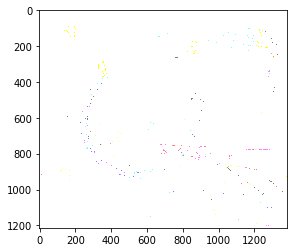

In [16]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))